In [301]:
import numpy as np
import matplotlib.pyplot as plt
from load import *
import os
import pickle
import random
from collections import Counter
import util

In [95]:
def folder_list(path,label):
    '''
    FOLDER_LIST(PATH,LABEL) appends label at the end of review 
    
    ---- input variables ----
    PATH: path of local folder
    LABEL: the label (-1 for negative or 1 for positive reviews)
    
    ---- output variable ----
    REVIEW: appended review
    '''
    
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

In [96]:
def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    #words = map(lambda Element: Element.translate(None, symbols).strip(), lines)
    words = map(lambda Element: Element.translate(str.maketrans("","",symbols)).strip(), lines)
    words = list(words)
    #words = list(filter(None, words))
    return words

In [377]:
def normalize_data(data):
    '''
    NOT COMPLETE!!!!
    input: bag of words representation of data
    '''
    
    # get max of each word
    feature_vec = Counter()
    for i in range(len(data)):
        feature_vec = feature_vec | data[i]

        
    for f in feature_vec:
        
    
    return feature_vec

In [403]:
pos_path = "data/pos"
neg_path = "data/neg"

pos_review = folder_list(pos_path,1)
neg_review = folder_list(neg_path,-1)

review = pos_review + neg_review
random.shuffle(review)

# normalize features

# splitting into 1500 training and 500 testing
data_train = review[0:1500]
data_test = review[1500:2001]

value_train = review

AttributeError: 'filter' object has no attribute 'append'

In [501]:
# getting data strings into bag of words representation
data_train_bag = bag_of_words(data_train)
data_test_bag = bag_of_words(data_test)

# get values of train and test
value_train = []
value_test = []
for i in range(1500):
    value_train.append(review[i][-1])
    
for i in range(500):
    value_test.append(review[1500+i][-1])

In [97]:
def bag_of_words(data):
    '''
    BAG_OF_WORDS(DATA) takes list of strings and calculates frequency of each word
    '''
    
    bag_data = [];
    for i_data in range(len(data)):
        bag_data.append(Counter(data[i_data][0:-1])) # not last entry bc that is label
        bag_label.append(data)
    return bag_data, bag_label
        

In [215]:
def pegasos(X,y,lambdaa):
    w = Counter() # setting empty counter
    t = 1
    i_iter = 0
    while i_iter < 10:
        for j in range(len(y)):
            t = t + 1
            eta = 1/(lambdaa*t)

            scale(w,(1-eta*lambdaa))
            if y[j]*util.dotProduct(w,X[j]) < 1:
                util.increment(w, eta*y[j], X[j]) # update weights

        i_iter = i_iter + 1
    
    return w

In [297]:
def fast_pegasos(X,y,lambdaa,n_epochs = 40):
    W = Counter() # initializing empty counter
    t = 1
    s = 1
    i_iter = 0
    
    while i_iter < n_epochs:
        for j in range(len(y)):
            t = t + 1
            eta = 1/(lambdaa*t)

            s = (1-1/t)*s
            
            if s*y[j]*util.dotProduct(W,X[j]) < 1:
                util.increment(W,(1/s)*eta*y[j],X[j])

        i_iter = i_iter + 1
    
    for f, v in W.items():
        w[f] = W.get(f, 0)*s
        
    return w

In [216]:
def scale(x,multiple):
    for f,v in x.items():
        x[f] = x.get(f, 0) * multiple 

In [310]:
def calc_loss(X,y,w):
    prediction = []
    for i in range(len(y)):
        prediction.append(dotProduct(w,X[i]))
    prediction = np.sign(prediction)
    
    loss = sum(y != prediction)/len(y)
    return loss

In [241]:
# checking timing and also checking that the two ways get same results

import time
start_time = time.time()
w = pegasos(data_train_bag,value_train,1)
t1 = time.time() - start_time
print("--- %s seconds ---" % (t1))

start_time = time.time()
w2 = fast_pegasos(data_train_bag,value_train,1)
t2 = time.time() - start_time
print("--- %s seconds ---" % (t2))

blah = []
for f, v in w.items():
    blah.append(w.get(f,0) - w2.get(f,0))

--- 263.99919390678406 seconds ---
--- 3.9446849822998047 seconds ---


In [317]:
# 6.8: PICKING A REGULARIZATION TERM

#param_grid = np.unique(np.concatenate((10.**np.arange(-6,1,1),np.arange(1,3,.3))))
#param_grid = 10.**np.linspace(-3,-1,10)
param_grid = np.linspace(.001,.01,10)

train_loss = []
test_loss = []
for i_param in range(len(param_grid)):
    lambdaa = param_grid[i_param]
    print(lambdaa)
    
    w = fast_pegasos(data_train_bag,value_train,lambdaa,convergence_criteria = .90)
    train_loss.append(calc_loss(data_train_bag,value_train,w))
    test_loss.append(calc_loss(data_test_bag,value_test,w))

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01


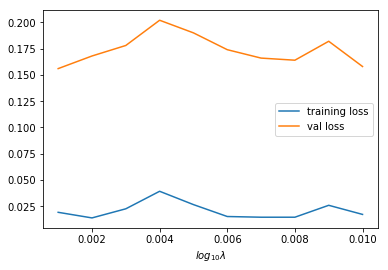

In [320]:
# plot training loss
plt.plot(param_grid,train_loss,label = 'training loss')
plt.plot(param_grid,test_loss,label = 'val loss')
plt.xlabel('$log_{10} \lambda$')
plt.legend()
plt.show()

In [323]:
# get weights for lambda of choice

lambdaa = .008
w = fast_pegasos(data_train_bag,value_train,lambdaa)

In [503]:
# 7: ERROR ANALYSIS

# find a problem that I got wrong. 
i = 0
idx = 0
idx_stop = 1
correct = True
while correct:
    prediction = dotProduct(w,data_test_bag[i])
    prediction = np.sign(prediction)
    correct = value_test[i] == prediction
    if ~correct:
        idx = idx + 1
        if idx_stop > idx:
            correct = True
    i = i + 1
i = i - 1

# get vector of weights
contributions = {}
for f,v in data_test_bag[i].items():
    contributions[f] = abs(v*w.get(f,0))

contributions = Counter(contributions)
    
ww = np.empty([20,1])
vv = np.empty([20,1])
j = 0
for f,v in contributions.most_common(20):
    ww[j] = w.get(f,0)
    vv[j] = data_test_bag[i].get(f,0)
    j = j + 1

    
# print top contributions
contributions.most_common(20)



[('the', 9.991500141664202),
 ('and', 7.466542224296169),
 ('to', 6.037399376676918),
 ('', 5.993650105831394),
 ('i', 5.549907501541558),
 ('no', 5.133247779203624),
 ('movie', 4.949917501374959),
 ('any', 3.318694688421857),
 ('seen', 3.124947917534694),
 ('on', 3.099948334194403),
 ('see', 3.0749487508541398),
 ('this', 3.0124497925034044),
 ('could', 2.8437026049565866),
 ('that', 2.5999566673889127),
 ('bad', 2.5728737854368924),
 ('you', 2.299961667305543),
 ('at', 2.2603789936834158),
 ('times', 2.243712604789914),
 ('so', 2.2395460075665437),
 ('there', 2.116631389476837)]

In [483]:
print(prediction)
print(value_test[i])
print(ww)
print(vv)

-1.0
1
[[-0.33541108]
 [ 0.22707955]
 [ 0.46665889]
 [-0.76457059]
 [-1.00414993]
 [-0.96456726]
 [-0.04374927]
 [-1.14373094]
 [ 0.47707538]
 [-2.57287379]
 [ 0.32082799]
 [ 0.76665389]
 [-0.51665806]
 [-0.61873969]
 [ 0.54165764]
 [ 0.80831986]
 [ 0.79582007]
 [ 0.7479042 ]
 [-0.36457726]
 [ 0.70832153]]
[[ 18.]
 [ 26.]
 [ 12.]
 [  7.]
 [  5.]
 [  5.]
 [ 81.]
 [  3.]
 [  7.]
 [  1.]
 [  8.]
 [  3.]
 [  4.]
 [  3.]
 [  3.]
 [  2.]
 [  2.]
 [  2.]
 [  4.]
 [  2.]]


In [505]:
# delete common words see if prediction is better
# THIS CODE IS BUGGY BC IT CHANGES ORIGINAL VARIABLE AS WELL
delete_vec = ['the','and',' ','at','to']
idx = 20

blah = data_test_bag[idx]
for v in delete_vec:
    print(v)
    print(blah[v])
    print(blah.get(v,0))
    blah[v] = blah.get(v,0)*0
    
ogpred = dotProduct(w,data_test_bag[idx])
pred = dotProduct(w,blah)

print(ogpred)
print(pred)

the
63
63
and
20
20
 
0
0
at
5
5
to
13
13
-13.0180687465
-13.0180687465


In [595]:
# 6.9 CORRELATION BETWEEN SCORE (CONFIDENCE) AND ACCURACY
y = value_test
X = data_test_bag
n_bins = 30

# calculate score for each
score = []
for i in range(len(y)):
    score.append(dotProduct(w,X[i]))

# sorting by margin
blah = np.transpose(np.reshape(np.concatenate([score,y]),[2,len(y)])) # make len(y) x 2 array
blah[blah[:,0].argsort(),] # sorting by first column

#put data into bins and get means of each bin
score_vec = []
value_vec = []
perc_correct_vec = []
bin_edges = np.round(np.linspace(0,len(y),n_bins+1))
for i_bin in range(n_bins):
    data = blah[int(bin_edges[i_bin]):int(bin_edges[i_bin+1])]
    score_vec.append(np.mean(data[:,0]))
    value_vec.append(np.mean(data[:,1]))
    perc_correct_vec.append(sum(np.sign(data[:,0])==data[:,1])/(bin_edges[i_bin+1]-bin_edges[i_bin]))

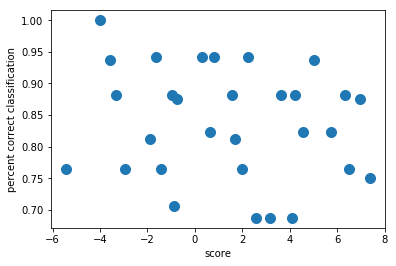

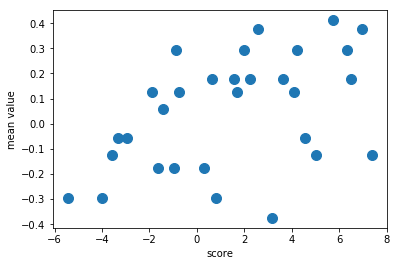

In [598]:
# plot these
plt.plot(score_vec,perc_correct_vec,'o',markersize = 10)
plt.xlabel('score')
plt.ylabel('percent correct classification')
plt.show()

plt.plot(score_vec,value_vec,'o',markersize = 10)
plt.xlabel('score')
plt.ylabel('mean value')
plt.show()

In [608]:
#6.10 IS YWX=1 EVEN A BIG DEAL?
score = np.array(score) # so that i can subtract 1 from every element in it
epsilon_vec = [1,.5,.1,.05,.01]

ones_vec = []
for i_epsilon in range(len(epsilon_vec)):
    epsilon = epsilon_vec[i_epsilon]
    ones_vec.append(sum(abs(score - 1) < epsilon))


In [611]:
np.array(ones_vec)/500

array([ 0.04 ,  0.024,  0.002,  0.   ,  0.   ])